In [214]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import pandas as pd
import re
from sklearn.linear_model import LinearRegression

In [215]:
df = pd.read_csv('/Users/tiziana/Desktop/PYTHON/TESI MAGISTRALE/PCA/DATESET.csv')
df=df.iloc[:, 1:]
df.head()


df.set_index(['Country'],inplace=True)
ita = pd.DataFrame(df.loc['Italy'])



In [216]:
ita.reset_index(inplace=True)
ita=ita.drop(['Country','Trimestre'],axis=1)

In [217]:
dftest = adfuller(ita['Gdp growth'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Gdp growth is Stationary ')
else:
    print('Non stationary')



dftest = adfuller(ita['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print(f'Current Account Non stationary with a pvalue of {dftest[1]}')


dftest = adfuller(ita['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print(f'Public Debt Non stationary with a value of {dftest[1]}')



dftest = adfuller(ita['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print(f'Financial Index Non stationary with a p-value of {dftest[1]}')

Gdp growth is Stationary 
Current Account Non stationary with a pvalue of 0.48493130940752527
Public Debt Non stationary with a value of 0.87924082529829
Financial Index Non stationary with a p-value of 0.4016132305610827


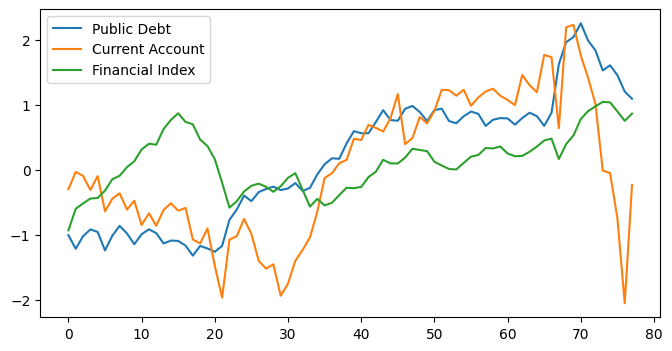

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))
plt.plot(ita['Public Debt'], label='Public Debt')
plt.plot(ita['Current Account'], label='Current Account')
plt.plot(ita['Financial index'], label='Financial Index')


plt.legend()

In [195]:
from statsmodels.tsa.api import VAR
model = VAR(ita)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()


,AIC,BIC,FPE,HQIC
0,-4.031,-3.903,0.01775,-3.980
1,-11.45,-10.81*,1.067e-05,-11.19*
2,-11.52,-10.36,9.994e-06,-11.06
3,-11.68,-10.01,8.614e-06,-11.02
4,-11.57,-9.383,9.859e-06,-10.70
5,-12.18,-9.484,5.527e-06,-11.11
6,-12.27,-9.058,5.349e-06,-10.99
7,-12.36,-8.636,5.288e-06,-10.88
8,-12.78*,-8.540,3.895e-06*,-11.10


In [196]:
ita_coin = ita.drop('Gdp growth',axis=1)
ita_coin

,Current Account,Public Debt,Financial index
0,-0.300178,-1.006796,-0.932263
1,-0.033292,-1.215278,-0.600768
2,-0.094736,-1.023314,-0.518481
3,-0.311774,-0.918218,-0.444050
4,-0.098190,-0.956321,-0.434618
...,...,...,...
73,-0.012465,1.524458,1.041682
74,-0.052154,1.604613,1.034813
75,-0.746414,1.452201,0.895014
76,-2.052969,1.200813,0.750944


In [197]:

from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
test = coint_johansen(ita_coin, det_order=1, k_ar_diff=8)

output = pd.DataFrame([test.lr1],  index=["trace_stat"], columns=['r=0', 'r<=1', 'r<=2'])
print(output.T, '\n')

cvt = pd.DataFrame(test.cvt, index=["r=0", "r<=1", "r<=2"], columns=["90%", "95%", "99%"])
print("Critical values(90%, 95%, 99%) of trace_stat\n", cvt, '\n')

print("Eigenvalues (lambda):\n")
print(test.eig, "\n")

print("Eigenvectors:")
evec = pd.DataFrame(test.evec).T
print(evec)

      trace_stat
r=0    42.471323
r<=1   18.373105
r<=2    5.186828 

Critical values(90%, 95%, 99%) of trace_stat
           90%      95%      99%
r=0   32.0645  35.0116  41.0815
r<=1  16.1619  18.3985  23.1485
r<=2   2.7055   3.8415   6.6349 

Eigenvalues (lambda):

[0.29478286 0.17395454 0.07241554] 

Eigenvectors:
          0         1         2
0  1.020571 -3.276693  2.984147
1  0.438110 -6.279123 -4.369980
2 -2.084100  0.000815  1.945694


In [198]:
ita['Current Account'] = ita['Current Account'].diff(1)
ita['Financial index'] = ita['Financial index'].diff(1)
ita['Public Debt']= ita['Public Debt'].diff(1)

ita=ita.iloc[1:]

In [218]:
dftest = adfuller(ita['Current Account'], autolag="AIC",regression = 'ct')
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print(f'Current Account Non stationary with {dftest[1]}')


dftest = adfuller(ita['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print(f'Public Debt Non stationary with {dftest[1]}')



dftest = adfuller(ita['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print('Financial Index Non stationary')

Current Account Non stationary with 0.6466187899200946
Public Debt Non stationary with 0.87924082529829
Financial Index Non stationary


In [200]:
from statsmodels.tsa.api import VAR
model = VAR(ita)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-11.00,-10.87,1.664e-05,-10.95
1,-11.57,-10.92*,9.477e-06,-11.31
2,-11.53,-10.36,9.926e-06,-11.06
3,-11.72,-10.04,8.245e-06,-11.06
4,-12.19,-9.986,5.306e-06,-11.31*
5,-12.24,-9.518,5.244e-06*,-11.16
6,-12.28*,-9.042,5.330e-06,-11.00
7,-12.14,-8.381,6.688e-06,-10.65
8,-12.16,-7.888,7.342e-06,-10.47


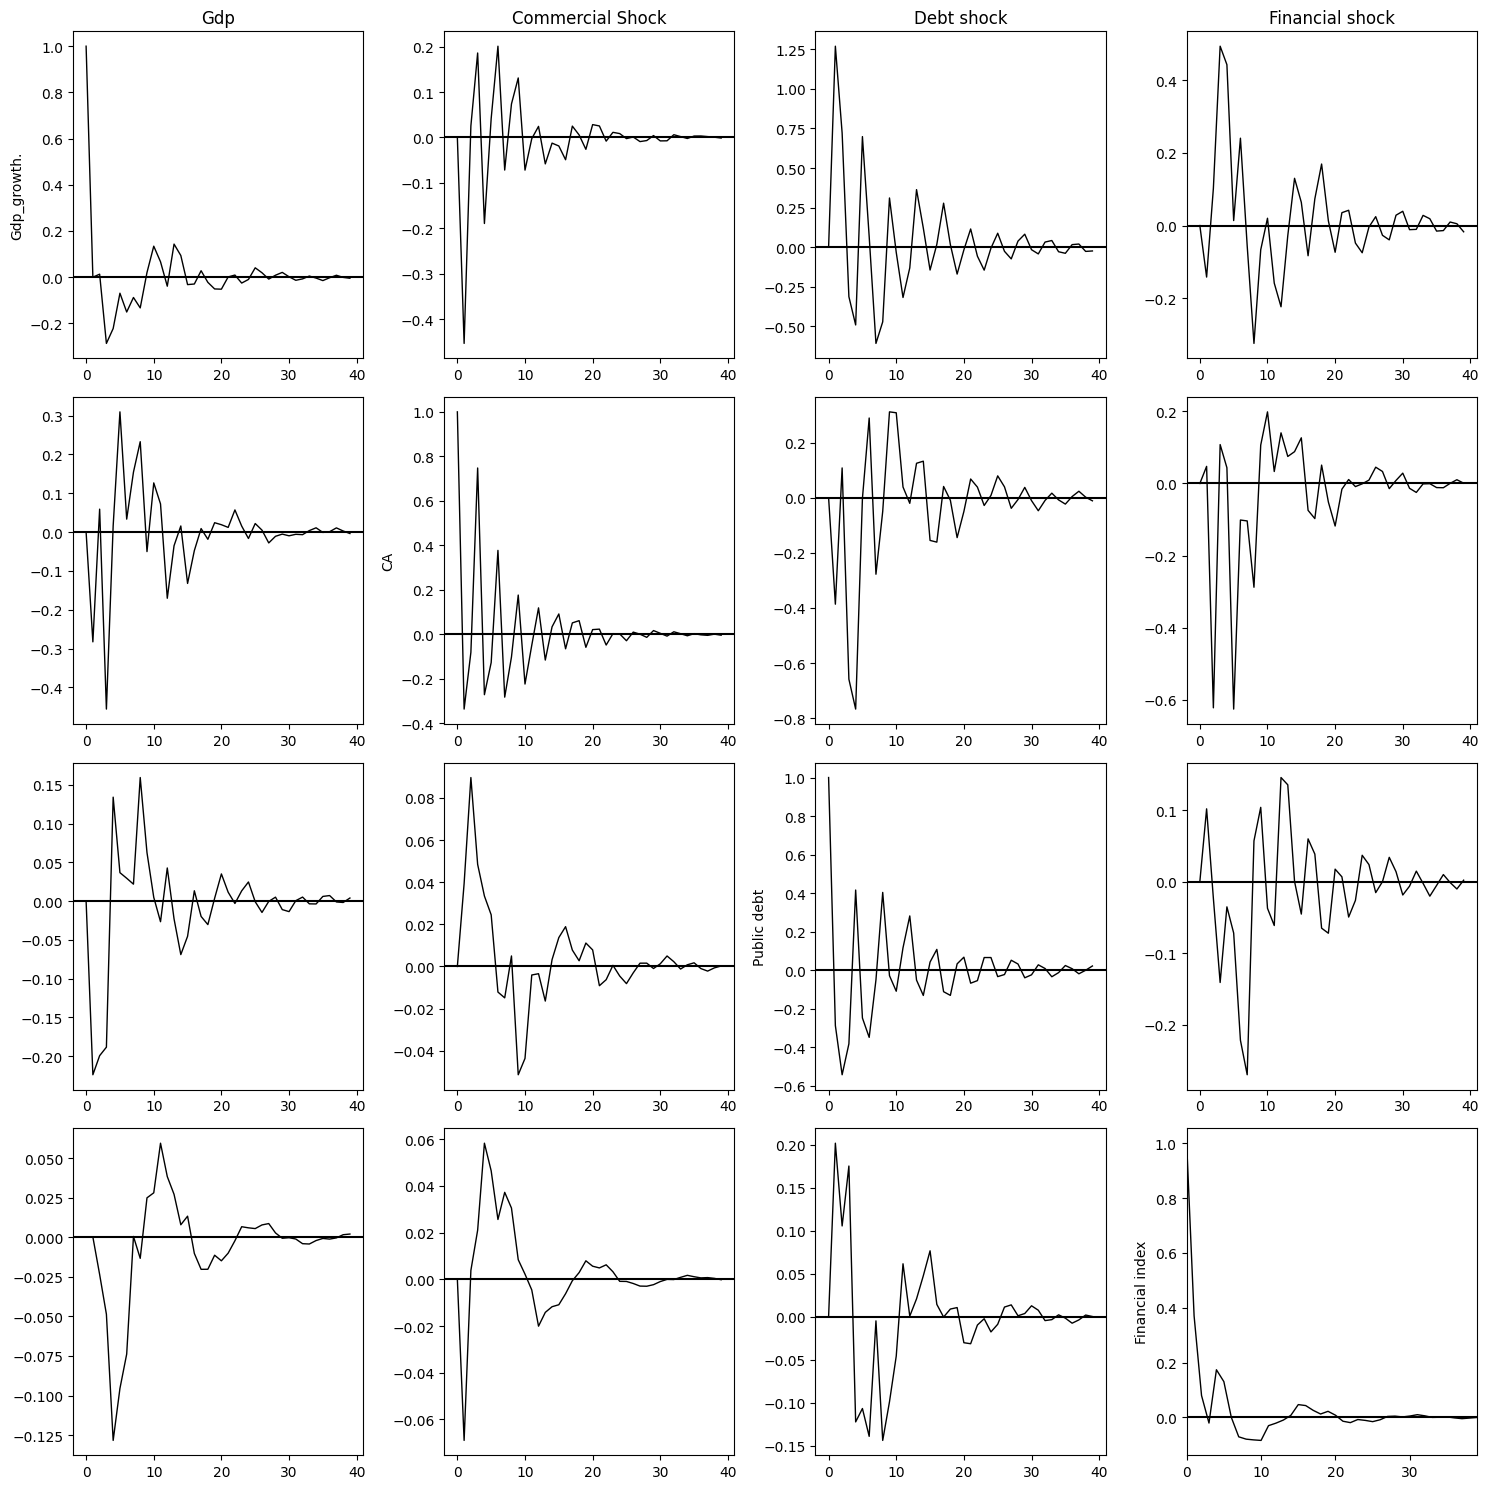

In [201]:
m = 4  #Considered Variable
p = 4 #Number of lags based on AIC criterion
c = 1  #Constant term
h = 40 #IRF horizon

T = len(ita)
Y = ita.iloc[p:, :] #Building a VAR(5) is not possible to consider first 5 observations

X_lagged  = pd.DataFrame()
for col in ita.columns:
    for i in range(1, p+1):
        X_lagged[f'{col}_lag_{i}'] = ita[col].shift(i)
X_lagged = X_lagged.iloc[p:,:]
X_lagged = X_lagged[[col for lag in sorted(set(int(re.search(r'_lag_(\d+)$', col).group(1)) 
                                               if re.search(r'_lag_(\d+)$', col) else 0 for col in X_lagged.columns)) 
                                               for col in [x for x in X_lagged.columns if re.search(fr'_lag_{lag}$', x)]] + 
                                               [x for x in X_lagged.columns if not re.search(r'_lag_\d+$', x)]]
X_lagged.insert(0, 'const', 1)


pi_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y) 
Y_fit = np.dot(X_lagged, pi_hat)
err = Y - Y_fit

A_comp = np.block([
[pi_hat[1:, :].T],
[np.eye(m * p - m), np.zeros((m * p - m, m))]
])



PHI = np.zeros((m, m, h))
for j in range(h):
    PHI_comp = np.linalg.matrix_power(A_comp, j)
    PHI[:, :, j] = PHI_comp[:m, :m]






PHI_plot = np.reshape(np.transpose(PHI, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp_growth.', 'CA', 'Public debt','Financial index']
Shocknames = ['Gdp', 'Commercial Shock', 'Debt shock','Financial shock']

ylab = 0

fig, axes = plt.subplots(m, m, figsize=(15, 15))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
    if k < 4: 
        ax.set_title(Shocknames[k]) 
    if k in [0, 5, 10,15]: 
        ax.set_ylabel(VARnames[ylab]) 
        ylab += 1
ax.set_xlim([0, h-1])
plt.tight_layout() 
plt.show()

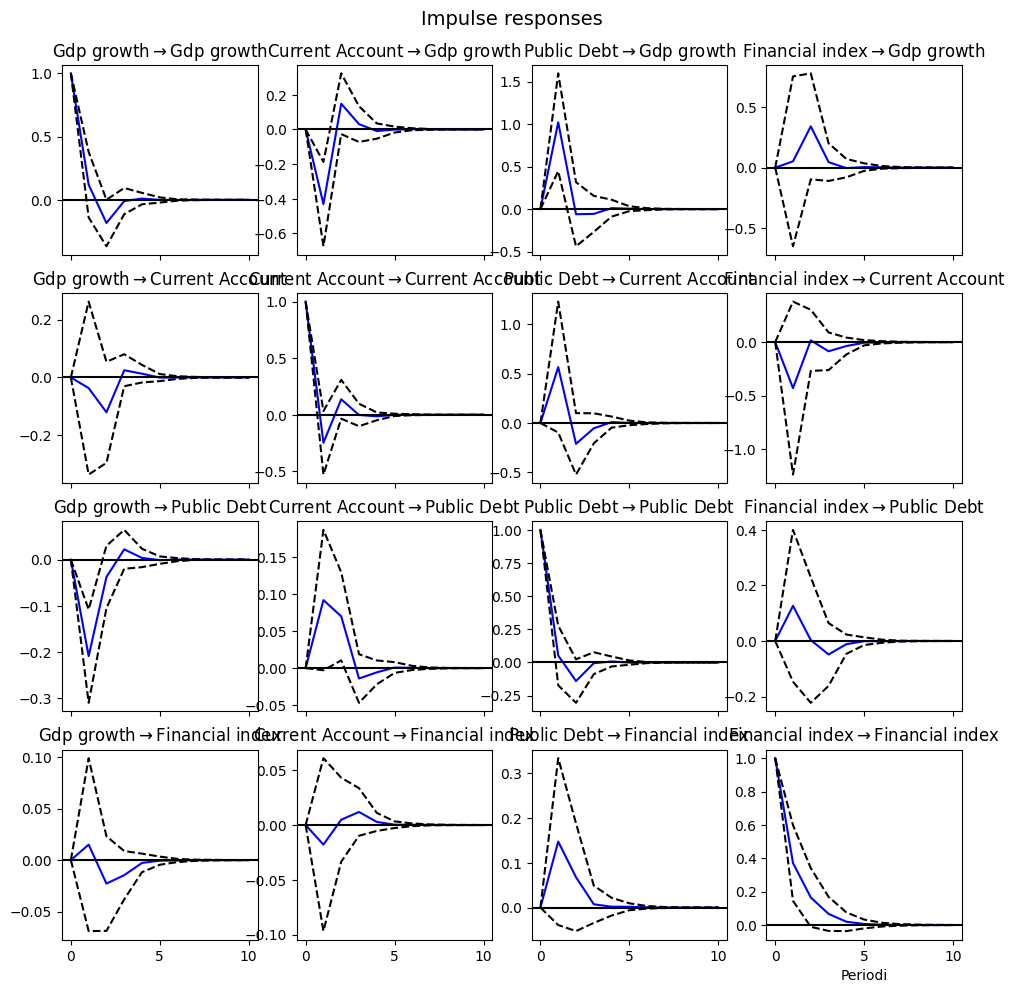

In [202]:
model = sm.tsa.VAR(ita)

# Stima il modello con un ordine di 6
results = model.fit(1)
irf = results.irf(10)

irf.plot(orth=False)
plt.xlabel('Periodi')

plt.show()

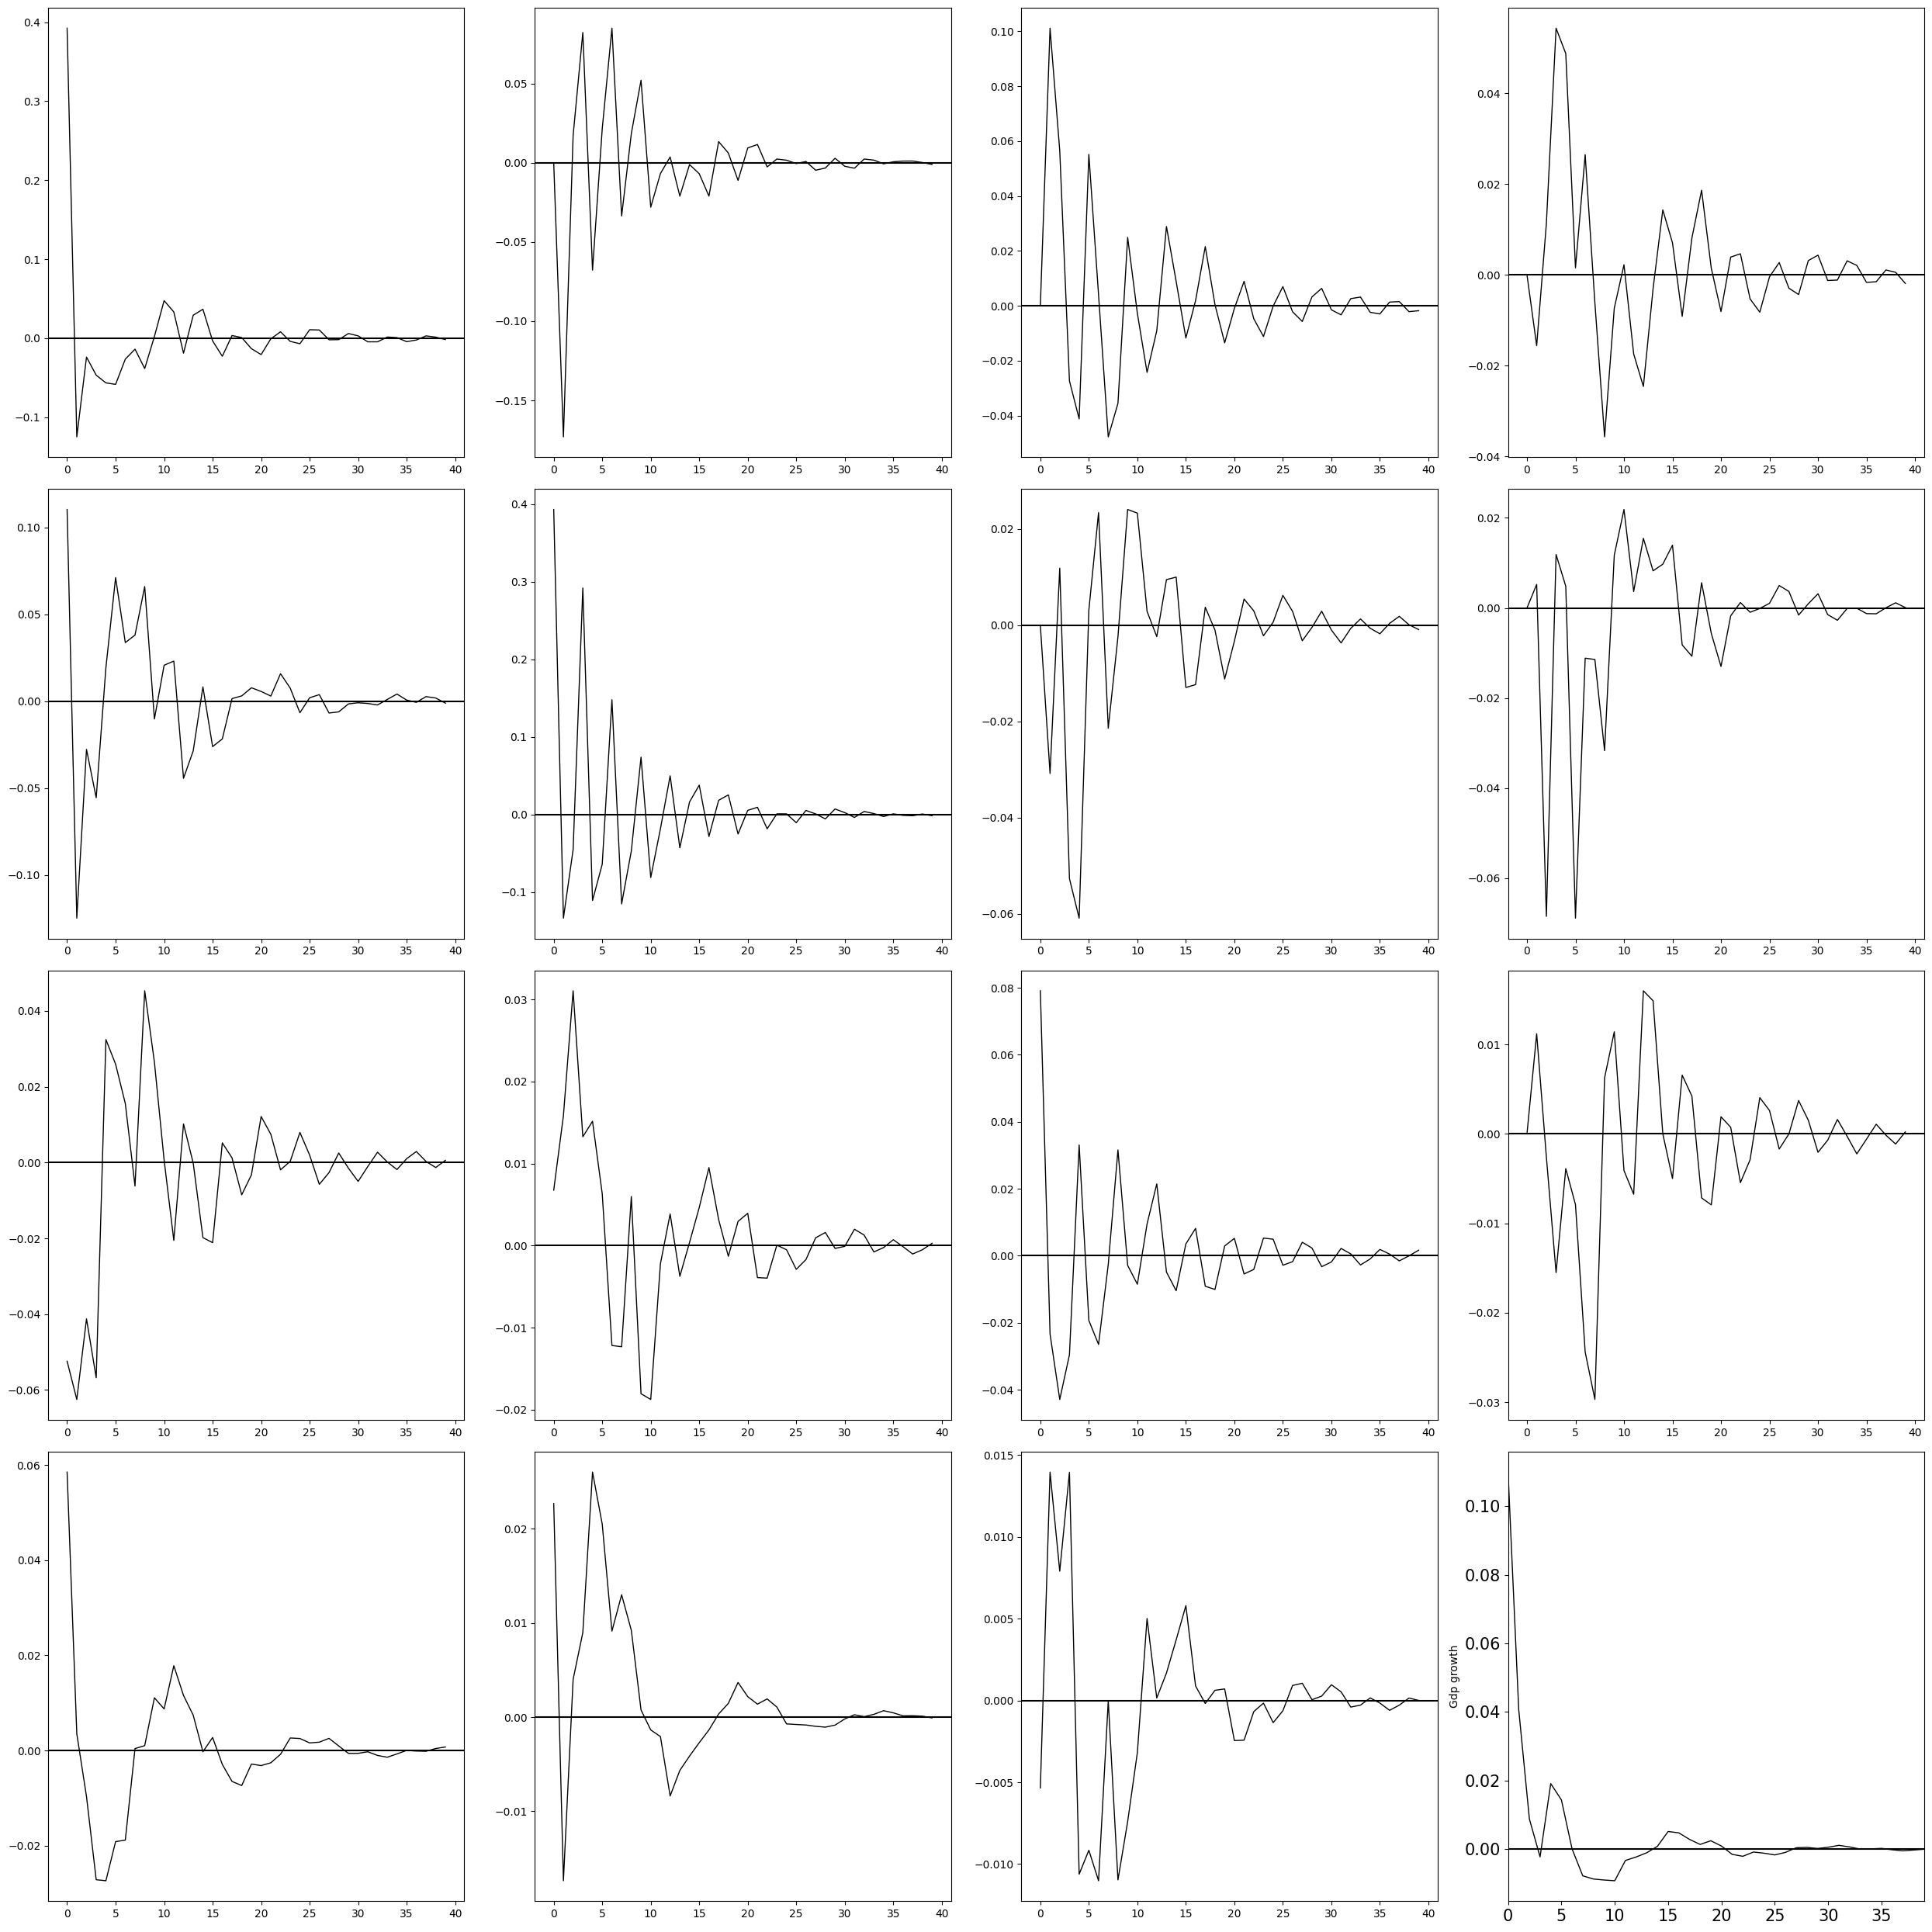

In [203]:
T = len(ita) - m * p - m

omega = np.dot(err.T, err) / T

P = np.linalg.cholesky(omega)
PHI_SR = np.zeros((m, m, h))

for i in range(h):
    PHI_SR[:, :, i] = np.dot(PHI[:, :, i], P)
    
PHI_SR_plot = np.reshape(np.transpose(PHI_SR, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp growth', 'Current Account', 'Public Debt','Financil index'] 
Shocknames = ['Gdp shock', 'Commercial shock', 'Debt shock','Financial shock']
ylab = 0
# Create subplots
fig, axes = plt.subplots(m, m, figsize=(25, 25))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_SR_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
if k < 4: 
    ax.set_title(Shocknames[k]) 
if k in [0, 5, 10, 15]: 
    ax.set_ylabel(VARnames[ylab]) 
    ylab += 1

ax.set_xlim([0, h-1]) 
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout() 
plt.show()

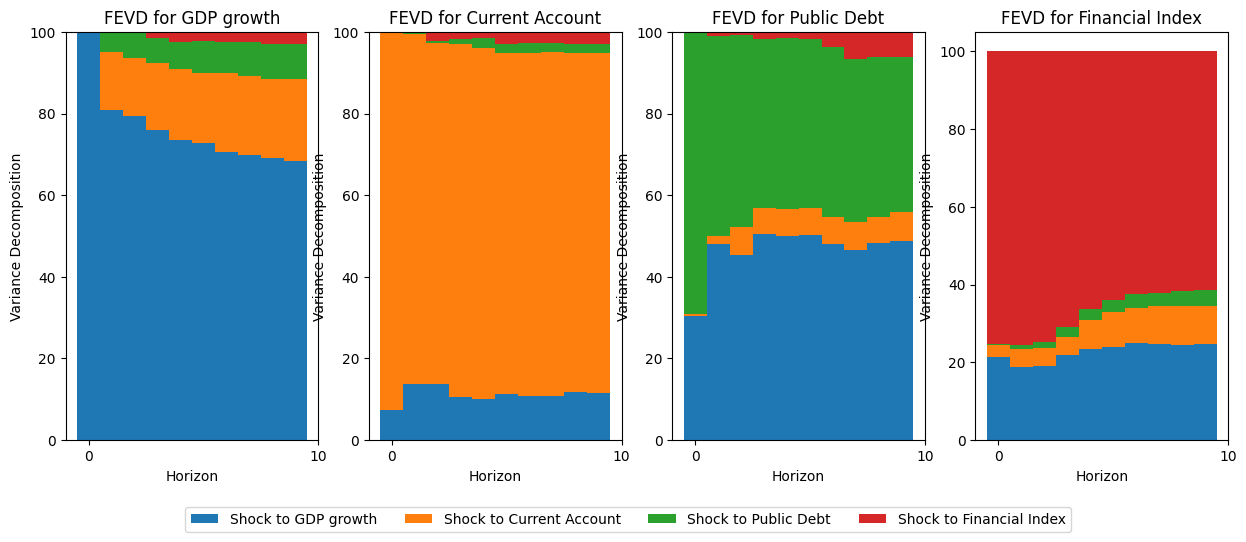

In [204]:
h = 10
MSE = np.zeros((m, m, h))
MSE_shock = np.zeros((m, m, h))
FEVD = np.zeros((h, m, m))

MSE[:, :, 0] = omega
for ii in range(m):
    for nn in range(1, h):
        MSE[:, :, nn] = MSE[:, :, nn - 1] + PHI[:, :, nn] @ omega @ PHI[:, :, nn].T
    MSE_shock[:, :, 0] = P[:, ii].reshape(-1, 1) @ P[:, ii].reshape(1, -1)

    for nn in range(1, h):
        MSE_shock[:, :, nn] = MSE_shock[:, :, nn - 1] + PHI[:, :, nn] @ MSE_shock[:, :, 0] @ PHI[:, :, nn].T
    FECD = MSE_shock[:, :, :] / MSE[:, :, :]

    for nn in range(h):
        for kk in range(m):
            FEVD[nn, ii, kk] = 100 * FECD[kk, kk, nn]

def plot_FEVD(FEVD_result, variable_names, horizon=40):
    """
    Plot FEVD results using stacked bar plots in subplots.
    FEVD_result: The FEVD matrix of shape (n, n, horizon)
    variable_names: List of names of the variables
    horizon: The number of periods ahead for the forecast
    """
    FEVD_result = FEVD_result.transpose((2, 1, 0))
    n = FEVD_result.shape[0]
    cols = 4
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))
    fig.subplots_adjust(bottom=0.2, hspace=0.4)

    if rows == 1:
        axes = axes.flatten()
    for i in range(n):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        bottom_values = np.zeros(horizon)
        for j in range(n):
            ax.bar(np.arange(horizon), FEVD_result[i, j, :], bottom=bottom_values, width=1, label=f"Shock to {variable_names[j]}")
            bottom_values += FEVD_result[i, j, :]
        ax.set_title(f"FEVD for {variable_names[i]}")
        ax.set_xlabel("Horizon")
        ax.set_ylabel("Variance Decomposition")
        ax.set_xticks(np.linspace(0, horizon, int(horizon / 10) + 1, endpoint=True))

    for i in range(n, rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        ax.axis('off')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=len(variable_names))

variable_names = ['GDP growth', 'Current Account', 'Public Debt', 'Financial Index']
plot_FEVD(FEVD, variable_names, h)


In [205]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(ita[['Current Account', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3851  , p=0.1268  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=2.4832  , p=0.1151  , df=1
likelihood ratio test: chi2=2.4435  , p=0.1180  , df=1
parameter F test:         F=2.3851  , p=0.1268  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1773  , p=0.0478  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=6.8085  , p=0.0332  , df=2
likelihood ratio test: chi2=6.5170  , p=0.0384  , df=2
parameter F test:         F=3.1773  , p=0.0478  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1645  , p=0.0301  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=10.4852 , p=0.0149  , df=3
likelihood ratio test: chi2=9.8059  , p=0.0203  , df=3
parameter F test:         F=3.1645  , p=0.0301  , df_denom=67, df_num=3


{1: ({'ssr_ftest': (2.3851443967268855, 0.12681787407487013, 73.0, 1),
   'ssr_chi2test': (2.4831640294690867, 0.11507055727412413, 1),
   'lrtest': (2.443460080862806, 0.11801565073189972, 1),
   'params_ftest': (2.3851443967268824, 0.12681787407487013, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.1772867371544526, 0.047775413972298564, 70.0, 2),
   'ssr_chi2test': (6.808471579616684, 0.033232206771477826, 2),
   'lrtest': (6.516951693970896, 0.038446952421714795, 2),
   'params_ftest': (3.1772867371544553, 0.047775413972298564, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.16446714010898, 0.030052816128208582, 67.0, 3),
   'ssr_chi2test': (10.485249329913335, 0.014861294014574216, 3),
   'lrtest': (9.805877771559253, 0.020290407658855404, 3),
   'params_ftest': (3.164467140108979, 0.030052816128208582, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

In [206]:
grangercausalitytests(ita[['Public Debt', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2837  , p=0.5959  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=0.2954  , p=0.5868  , df=1
likelihood ratio test: chi2=0.2948  , p=0.5872  , df=1
parameter F test:         F=0.2837  , p=0.5959  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9923  , p=0.1440  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=4.2692  , p=0.1183  , df=2
likelihood ratio test: chi2=4.1521  , p=0.1254  , df=2
parameter F test:         F=1.9923  , p=0.1440  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1027  , p=0.1081  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=6.9672  , p=0.0730  , df=3
likelihood ratio test: chi2=6.6585  , p=0.0836  , df=3
parameter F test:         F=2.1027  , p=0.1081  , df_denom=67, df_num=3


{1: ({'ssr_ftest': (0.2837087370853125, 0.5958983026489806, 73.0, 1),
   'ssr_chi2test': (0.2953680002532021, 0.5868009471442917, 1),
   'lrtest': (0.29479552083012095, 0.5871637098533993, 1),
   'params_ftest': (0.2837087370853111, 0.5958983026489806, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.9922903052533951, 0.14404189618321686, 70.0, 2),
   'ssr_chi2test': (4.269193511257275, 0.11829228145708251, 2),
   'lrtest': (4.1521094485839285, 0.1254240698917666, 2),
   'params_ftest': (1.9922903052533893, 0.14404189618321744, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.1027164998894112, 0.10811314129962299, 67.0, 3),
   'ssr_chi2test': (6.96720989515596, 0.07295028079364112, 3),
   'lrtest': (6.658458091520231, 0.08361846877053011, 3),
   'params_ftest': (2.1027164998894023, 0.10811314129962438, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [207]:
grangercausalitytests(ita[['Gdp growth', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0093  , p=0.9233  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=0.0097  , p=0.9215  , df=1
likelihood ratio test: chi2=0.0097  , p=0.9215  , df=1
parameter F test:         F=0.0093  , p=0.9233  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8618  , p=0.4268  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=1.8467  , p=0.3972  , df=2
likelihood ratio test: chi2=1.8243  , p=0.4017  , df=2
parameter F test:         F=0.8618  , p=0.4268  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6507  , p=0.5853  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=2.1562  , p=0.5406  , df=3
likelihood ratio test: chi2=2.1254  , p=0.5468  , df=3
parameter F test:         F=0.6507  , p=0.5853  , df_denom=67, df_num=3


{1: ({'ssr_ftest': (0.009325377403871038, 0.9233341025169564, 73.0, 1),
   'ssr_chi2test': (0.009708612091701355, 0.9215096333152161, 1),
   'lrtest': (0.009707992031735557, 0.9215121317268106, 1),
   'params_ftest': (0.009325377403886526, 0.92333410251689, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.861772237709411, 0.4268451717426298, 70.0, 2),
   'ssr_chi2test': (1.846654795091595, 0.39719521347702663, 2),
   'lrtest': (1.824286986337853, 0.40166234016018826, 2),
   'params_ftest': (0.8617722377094177, 0.42684517174262626, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6507428824279331, 0.5852551180817993, 67.0, 3),
   'ssr_chi2test': (2.1561928343134498, 0.5406284771084711, 3),
   'lrtest': (2.1253767168302033, 0.5467959653240251, 3),
   'params_ftest': (0.6507428824279323, 0.5852551180817993, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [208]:
grangercausalitytests(ita[['Financial index', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0007  , p=0.9791  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=0.0007  , p=0.9786  , df=1
likelihood ratio test: chi2=0.0007  , p=0.9786  , df=1
parameter F test:         F=0.0007  , p=0.9791  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3088  , p=0.7353  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=0.6617  , p=0.7183  , df=2
likelihood ratio test: chi2=0.6588  , p=0.7194  , df=2
parameter F test:         F=0.3088  , p=0.7353  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1495  , p=0.9296  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=0.4954  , p=0.9199  , df=3
likelihood ratio test: chi2=0.4938  , p=0.9203  , df=3
parameter F test:         F=0.1495  , p=0.9296  , df_denom=67, df_num=3


{1: ({'ssr_ftest': (0.0006918529583884579, 0.9790873563188064, 73.0, 1),
   'ssr_chi2test': (0.0007202852717468877, 0.9785888400792129, 1),
   'lrtest': (0.0007202818585483328, 0.9785888907973692, 1),
   'params_ftest': (0.0006918529583580111, 0.9790873563191739, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.3087834925364369, 0.735334818787015, 70.0, 2),
   'ssr_chi2test': (0.6616789125780791, 0.718320481619746, 2),
   'lrtest': (0.6587771737062553, 0.7193634272577405, 2),
   'params_ftest': (0.30878349253645004, 0.7353348187870036, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.1495238651144529, 0.9296470886474524, 67.0, 3),
   'ssr_chi2test': (0.49543728440908275, 0.9198926708645911, 3),
   'lrtest': (0.49378614929224796, 0.920254431428928, 3),
   'params_ftest': (0.14952386511445395, 0.9296470886474508, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

In [209]:
grangercausalitytests(ita[['Public Debt', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0051  , p=0.9433  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=0.0053  , p=0.9420  , df=1
likelihood ratio test: chi2=0.0053  , p=0.9420  , df=1
parameter F test:         F=0.0051  , p=0.9433  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.7702  , p=0.0279  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=8.0789  , p=0.0176  , df=2
likelihood ratio test: chi2=7.6727  , p=0.0216  , df=2
parameter F test:         F=3.7702  , p=0.0279  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2711  , p=0.0882  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=7.5253  , p=0.0569  , df=3
likelihood ratio test: chi2=7.1667  , p=0.0668  , df=3
parameter F test:         F=2.2711  , p=0.0882  , df_denom=67, df_num=3


{1: ({'ssr_ftest': (0.005085466155154238, 0.9433440954766499, 73.0, 1),
   'ssr_chi2test': (0.005294457914955096, 0.9419946941162309, 1),
   'lrtest': (0.005294273507161051, 0.9419957025159431, 1),
   'params_ftest': (0.005085466155154363, 0.9433440954766499, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.7701565204832006, 0.02785910441946419, 70.0, 2),
   'ssr_chi2test': (8.07890682960686, 0.01760709356269158, 2),
   'lrtest': (7.672704550489357, 0.02157214725663678, 2),
   'params_ftest': (3.770156520483202, 0.027859104419464074, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.2711343525897374, 0.08823290157216171, 67.0, 3),
   'ssr_chi2test': (7.525251138431667, 0.056913179629250014, 3),
   'lrtest': (7.166730464126033, 0.06676916615427471, 3),
   'params_ftest': (2.2711343525897334, 0.08823290157216211, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

In [210]:
grangercausalitytests(ita[['Gdp growth', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0910  , p=0.0270  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=5.3002  , p=0.0213  , df=1
likelihood ratio test: chi2=5.1235  , p=0.0236  , df=1
parameter F test:         F=5.0910  , p=0.0270  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2


ssr based F test:         F=3.3370  , p=0.0413  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=7.1507  , p=0.0280  , df=2
likelihood ratio test: chi2=6.8300  , p=0.0329  , df=2
parameter F test:         F=3.3370  , p=0.0413  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8850  , p=0.0421  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=9.5592  , p=0.0227  , df=3
likelihood ratio test: chi2=8.9903  , p=0.0294  , df=3
parameter F test:         F=2.8850  , p=0.0421  , df_denom=67, df_num=3


{1: ({'ssr_ftest': (5.0909706971913105, 0.0270456760579205, 73.0, 1),
   'ssr_chi2test': (5.300188671048488, 0.021323114565090645, 1),
   'lrtest': (5.1235397675801835, 0.023603422245314067, 1),
   'params_ftest': (5.090970697191333, 0.027045676057920104, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.336984135214316, 0.04128131018530113, 70.0, 2),
   'ssr_chi2test': (7.1506802897449635, 0.028005898091282434, 2),
   'lrtest': (6.830025898558915, 0.03287598097849192, 2),
   'params_ftest': (3.336984135214324, 0.04128131018530096, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.8849893040135153, 0.0420614117274966, 67.0, 3),
   'ssr_chi2test': (9.559218290910456, 0.022709650927320153, 3),
   'lrtest': (8.990296139907912, 0.029420183249933396, 3),
   'params_ftest': (2.8849893040135117, 0.04206141172749689, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

In [211]:
grangercausalitytests(ita[['Financial index', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2849  , p=0.1350  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=2.3788  , p=0.1230  , df=1
likelihood ratio test: chi2=2.3423  , p=0.1259  , df=1
parameter F test:         F=2.2849  , p=0.1350  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6886  , p=0.1922  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=3.6185  , p=0.1638  , df=2
likelihood ratio test: chi2=3.5339  , p=0.1709  , df=2
parameter F test:         F=1.6886  , p=0.1922  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3234  , p=0.0248  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=11.0120 , p=0.0117  , df=3
likelihood ratio test: chi2=10.2658 , p=0.0164  , df=3
parameter F test:         F=3.3234  , p=0.0248  , df_denom=67, df_num=3


{1: ({'ssr_ftest': (2.2849124163934, 0.13495460132356835, 73.0, 1),
   'ssr_chi2test': (2.3788129266561424, 0.1229909737917854, 1),
   'lrtest': (2.3423433521618904, 0.1259000352456505, 1),
   'params_ftest': (2.2849124163933676, 0.13495460132357054, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.688610676863118, 0.1922149817111623, 70.0, 2),
   'ssr_chi2test': (3.6184514504209666, 0.16378089914314, 2),
   'lrtest': (3.533873222002626, 0.17085558507861157, 2),
   'params_ftest': (1.6886106768631286, 0.19221498171116125, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.3234292659667783, 0.02483626235410508, 67.0, 3),
   'ssr_chi2test': (11.011959657382459, 0.011661380655106086, 3),
   'lrtest': (10.265787287769456, 0.016436847150324466, 3),
   'params_ftest': (3.3234292659667823, 0.02483626235410508, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [212]:
grangercausalitytests(ita[['Current Account', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5900  , p=0.0355  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=4.7786  , p=0.0288  , df=1
likelihood ratio test: chi2=4.6344  , p=0.0313  , df=1
parameter F test:         F=4.5900  , p=0.0355  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5321  , p=0.0346  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=7.5688  , p=0.0227  , df=2
likelihood ratio test: chi2=7.2107  , p=0.0272  , df=2
parameter F test:         F=3.5321  , p=0.0346  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5769  , p=0.2031  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=5.2250  , p=0.1560  , df=3
likelihood ratio test: chi2=5.0487  , p=0.1683  , df=3
parameter F test:         F=1.5769  , p=0.2031  , df_denom=67, df_num=3


{1: ({'ssr_ftest': (4.589955157757769, 0.035494988083465184, 73.0, 1),
   'ssr_chi2test': (4.778583451912198, 0.02881581530919768, 1),
   'lrtest': (4.634368570234642, 0.03133767399990785, 1),
   'params_ftest': (4.589955157757749, 0.035494988083465705, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.532088006021497, 0.03456149568194479, 70.0, 2),
   'ssr_chi2test': (7.568760012903208, 0.022722946490599038, 2),
   'lrtest': (7.210746553175781, 0.027177298270271287, 2),
   'params_ftest': (3.532088006021503, 0.03456149568194464, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.5768994495097424, 0.20312529657396058, 67.0, 3),
   'ssr_chi2test': (5.224950414793475, 0.15604704954492682, 3),
   'lrtest': (5.048737800581264, 0.16826291314708694, 3),
   'params_ftest': (1.5768994495097426, 0.20312529657396058, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [213]:
grangercausalitytests(ita[['Gdp growth', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1356  , p=0.0264  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=5.3466  , p=0.0208  , df=1
likelihood ratio test: chi2=5.1669  , p=0.0230  , df=1
parameter F test:         F=5.1356  , p=0.0264  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2008  , p=0.0468  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=6.8588  , p=0.0324  , df=2
likelihood ratio test: chi2=6.5631  , p=0.0376  , df=2
parameter F test:         F=3.2008  , p=0.0468  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7589  , p=0.0490  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=9.1415  , p=0.0275  , df=3
likelihood ratio test: chi2=8.6195  , p=0.0348  , df=3
parameter F test:         F=2.7589  , p=0.0490  , df_denom=67, df_num=3


{1: ({'ssr_ftest': (5.13557570062352, 0.026405062069407573, 73.0, 1),
   'ssr_chi2test': (5.346626756813527, 0.02076240151180589, 1),
   'lrtest': (5.166938030309893, 0.02302075848784479, 1),
   'params_ftest': (5.135575700623504, 0.026405062069407844, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.2007721656537047, 0.046758072293256875, 70.0, 2),
   'ssr_chi2test': (6.858797497829367, 0.03240641931135622, 2),
   'lrtest': (6.563075075954174, 0.03757044638757018, 2),
   'params_ftest': (3.2007721656537154, 0.04675807229325628, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.758931107781643, 0.04896411747268525, 67.0, 3),
   'ssr_chi2test': (9.141532924291415, 0.027467128729079797, 3),
   'lrtest': (8.619466595509493, 0.03480242355035095, 3),
   'params_ftest': (2.758931107781647, 0.04896411747268486, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0